Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

Load and preprocess the dataset

In [2]:
data = pd.read_csv('spam.csv', encoding='latin-1')
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

Encode the labels

In [3]:
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

Split the data into training and testing sets

In [4]:
X = data['message']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train a text classification model

In [5]:
vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_transformed, y_train)

MultinomialNB()

Evaluate the model

In [6]:
y_pred = model.predict(X_test_transformed)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.9838565022421525
Confusion Matrix:
[[963   2]
 [ 16 134]]


Visualize the classification results using a bar chart

In [7]:
labels = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
true_positives = conf_matrix[1, 1]
true_negatives = conf_matrix[0, 0]
false_positives = conf_matrix[0, 1]
false_negatives = conf_matrix[1, 0]


Values for the bar chart

Text(0.5, 1.0, 'SMS Spam Classification Results')

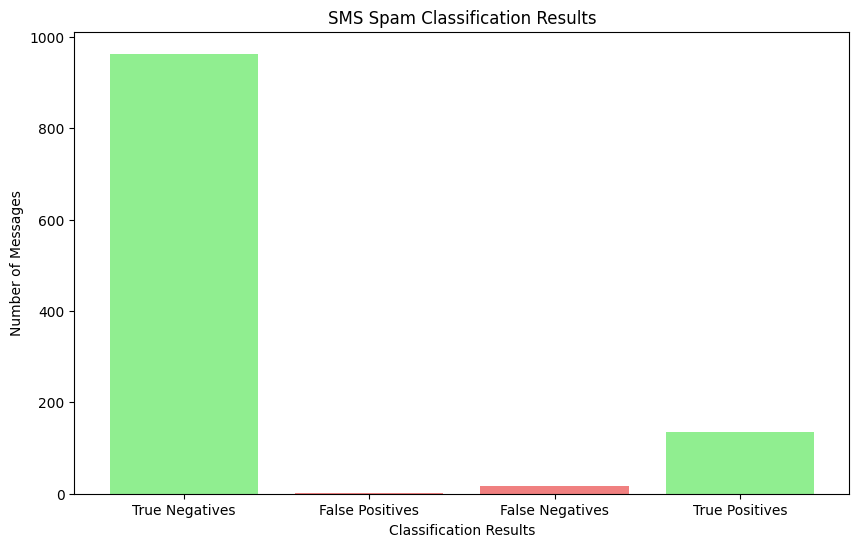

In [8]:
values = [true_negatives, false_positives, false_negatives, true_positives]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['lightgreen', 'lightcoral', 'lightcoral', 'lightgreen'])
plt.xlabel('Classification Results')
plt.ylabel('Number of Messages')
plt.title('SMS Spam Classification Results')
